# Hackathon 1

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

Downloaded the CarPrice analysis dataset from Kaggle and uploaded it onto gitpod

## Inputs

* import numpy as np
* import pandas as pd
* import matplotlib.pyplot as plt
* import seaborn as sns
* sns.set_style('whitegrid')

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Hackathon1/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Hackathon1'

# Section 1 - Importing libraries and Data Set

Import all the packages and the Feature enigne needed to perform the analysis on the dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import plotly.express as px
from scipy.stats import f_oneway


In [5]:
df = pd.read_csv('CarPrice_Assignment.csv')

#### *Checking what the data looks like*

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.shape

(205, 26)

There are 205 entries. Some of the columns are not factors in determining price so I will drop them from the dataset

In [8]:
df = df.drop(columns=['car_ID','symboling'], axis=1)


In [9]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Check for missing data
df.isnull().sum()

CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Since there is no missing data, I will move onto the next step

In [11]:
gas_data = df[df['fueltype'] == 'gas']
mean_price = gas_data['price'].mean() 
print(f"Mean price for gas: {mean_price}") 

Mean price for gas: 12999.7982


In [12]:
gas_data = df[df['fueltype'] == 'diesel']
mean_price = gas_data['price'].mean() 
print(f"Mean price for diesel: {mean_price}") 

Mean price for diesel: 15838.15


In [13]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

Although the mean price of diesel seems to be higher according the the data, because the sample size of diesel is so low, it can't be used to draw meaningful conclusions so the "fueltype" column will be dropped

There are still a lot of columns, ones that I believe have no real influence over the price. I will check if there is a correlation between those variables.

In [19]:
df_corr = df.corr(method='pearson')

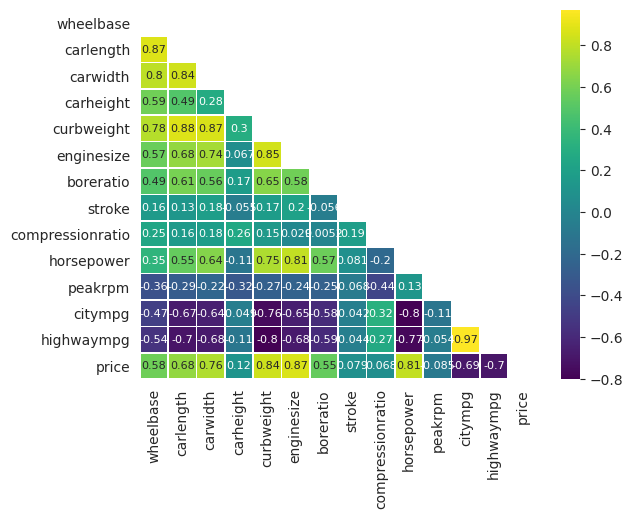

In [20]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()

Looking at this chart we can see that there appears to be a strong correlation between some of variables and the price and other variables seem to have less of an effect. Using this information, along with my background knowledge I will further drop some columns as I believe they aren't significant in determining the price, or they overlap with others (such as wheel base and car length). The Columns I will drop are:
* Wheelbase
* carwidth (as it's strongly correlated to carlength)
* Car Height
* Curb weight (as it's a product of length and width and engine size. Also weight has never been a prominant factor in buying choice)
* Bore Ratio
* Stroke
* Compression Ratio (It's linked to power and efficiency so it overlaps)
* Peak RPM
* highwaympg (very strongly correlated to city mpg (0.97!))


In [32]:
# df PreProcessed
df_pp = df.drop(columns=['fueltype','wheelbase','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','peakrpm','highwaympg'])
df_pp

,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,price
0,alfa-romero giulia,std,two,convertible,rwd,front,168.8,dohc,four,130,mpfi,111,21,13495.0
1,alfa-romero stelvio,std,two,convertible,rwd,front,168.8,dohc,four,130,mpfi,111,21,16500.0
2,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,171.2,ohcv,six,152,mpfi,154,19,16500.0
3,audi 100 ls,std,four,sedan,fwd,front,176.6,ohc,four,109,mpfi,102,24,13950.0
4,audi 100ls,std,four,sedan,4wd,front,176.6,ohc,five,136,mpfi,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),std,four,sedan,rwd,front,188.8,ohc,four,141,mpfi,114,23,16845.0
201,volvo 144ea,turbo,four,sedan,rwd,front,188.8,ohc,four,141,mpfi,160,19,19045.0
202,volvo 244dl,std,four,sedan,rwd,front,188.8,ohcv,six,173,mpfi,134,18,21485.0
203,volvo 246,turbo,four,sedan,rwd,front,188.8,ohc,six,145,idi,106,26,22470.0


I now want to check what correlation the categorical variables have with price, if any. First I'll check the datatypes and then check the value counts of each column 

In [15]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   carlength       205 non-null    float64
 7   enginetype      205 non-null    object 
 8   cylindernumber  205 non-null    object 
 9   enginesize      205 non-null    int64  
 10  fuelsystem      205 non-null    object 
 11  horsepower      205 non-null    int64  
 12  citympg         205 non-null    int64  
 13  price           205 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 22.5+ KB


In [17]:
def count_value_occurrences(df):
    """
    Counts the occurrences of each unique value in every column of a DataFrame.

    Args:
        df: The pandas DataFrame to analyze.

    Returns:
        A dictionary where keys are column names and values are dictionaries 
        containing the counts of each unique value in that column.
    """
    value_counts_dict = {}
    for col in df.columns:
        value_counts_dict[col] = df[col].value_counts().to_dict()
    return value_counts_dict

df_cat = df_pp.drop(columns = 'CarName')
df_categorical = df_cat.select_dtypes(include=['object', 'category', 'bool']) 
value_counts = count_value_occurrences(df_categorical)
print(value_counts)

{'aspiration': {'std': 168, 'turbo': 37}, 'doornumber': {'four': 115, 'two': 90}, 'carbody': {'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6}, 'drivewheel': {'fwd': 120, 'rwd': 76, '4wd': 9}, 'enginelocation': {'front': 202, 'rear': 3}, 'enginetype': {'ohc': 148, 'ohcf': 15, 'ohcv': 13, 'dohc': 12, 'l': 12, 'rotor': 4, 'dohcv': 1}, 'cylindernumber': {'four': 159, 'six': 24, 'five': 11, 'eight': 5, 'two': 4, 'three': 1, 'twelve': 1}, 'fuelsystem': {'mpfi': 94, '2bbl': 66, 'idi': 20, '1bbl': 11, 'spdi': 9, '4bbl': 3, 'mfi': 1, 'spfi': 1}}


Some of the columns have values that occur in very small numbers (less than 10). Statisctically speaking, any sample less than 30 is considered small. I'll perform a one way ANOVA test to see if difference in prices occured by chance or not. The null hypothesis is that the variable has no effect on price. If the p-value <0.05 then we'll reject the null hypothesis.

In [29]:
# Perform one-way ANOVA to test for significant differences in mean price across categories
for col in df_categorical:
    groups = df.groupby(col)['price'].apply(list).tolist()  # Convert to list of lists
    if len(groups) > 1:  # Check if there are multiple groups
        try:
            f_statistic, p_value = f_oneway(*groups)
            print(f"Column: {col}")
            print(f"F-statistic: {f_statistic}")
            print(f"p-value: {p_value}")
            print("--------------------")
        except ValueError:
            print(f"Warning: One-way ANOVA could not be performed for column '{col}'.")
    else:
        print(f"Warning: Insufficient groups for ANOVA in column '{col}'.")

Column: aspiration
F-statistic: 6.636621968649918
p-value: 0.010700300833183433
--------------------
Column: doornumber
F-statistic: 0.20594600575940436
p-value: 0.6504483953298938
--------------------
Column: carbody
F-statistic: 8.031976496876302
p-value: 5.031712258477608e-06
--------------------
Column: drivewheel
F-statistic: 70.32055264969262
p-value: 6.632887281209634e-24
--------------------
Column: enginelocation
F-statistic: 23.9697400547047
p-value: 1.993019639057392e-06
--------------------
Column: enginetype
F-statistic: 9.376220306463628
p-value: 4.692664568743044e-09
--------------------
Column: cylindernumber
F-statistic: 57.568880995353695
p-value: 8.065780498463557e-41
--------------------
Column: fuelsystem
F-statistic: 15.64186457466332
p-value: 2.9903859089321575e-16
--------------------


From this result, I will drop all the object variables apart from 'aspiration'. Whilst I know from my background knowledge that some of the other variables can have a significant affect on the price, the data shows otherwise, which means the sample size is too small. This will be taken into consideration when making the conclusions.

In [33]:
df_pp_final = df_pp.drop(columns=['doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])
df_pp_final

,CarName,aspiration,carlength,enginesize,horsepower,citympg,price
0,alfa-romero giulia,std,168.8,130,111,21,13495.0
1,alfa-romero stelvio,std,168.8,130,111,21,16500.0
2,alfa-romero Quadrifoglio,std,171.2,152,154,19,16500.0
3,audi 100 ls,std,176.6,109,102,24,13950.0
4,audi 100ls,std,176.6,136,115,18,17450.0
...,...,...,...,...,...,...,...
200,volvo 145e (sw),std,188.8,141,114,23,16845.0
201,volvo 144ea,turbo,188.8,141,160,19,19045.0
202,volvo 244dl,std,188.8,173,134,18,21485.0
203,volvo 246,turbo,188.8,145,106,26,22470.0


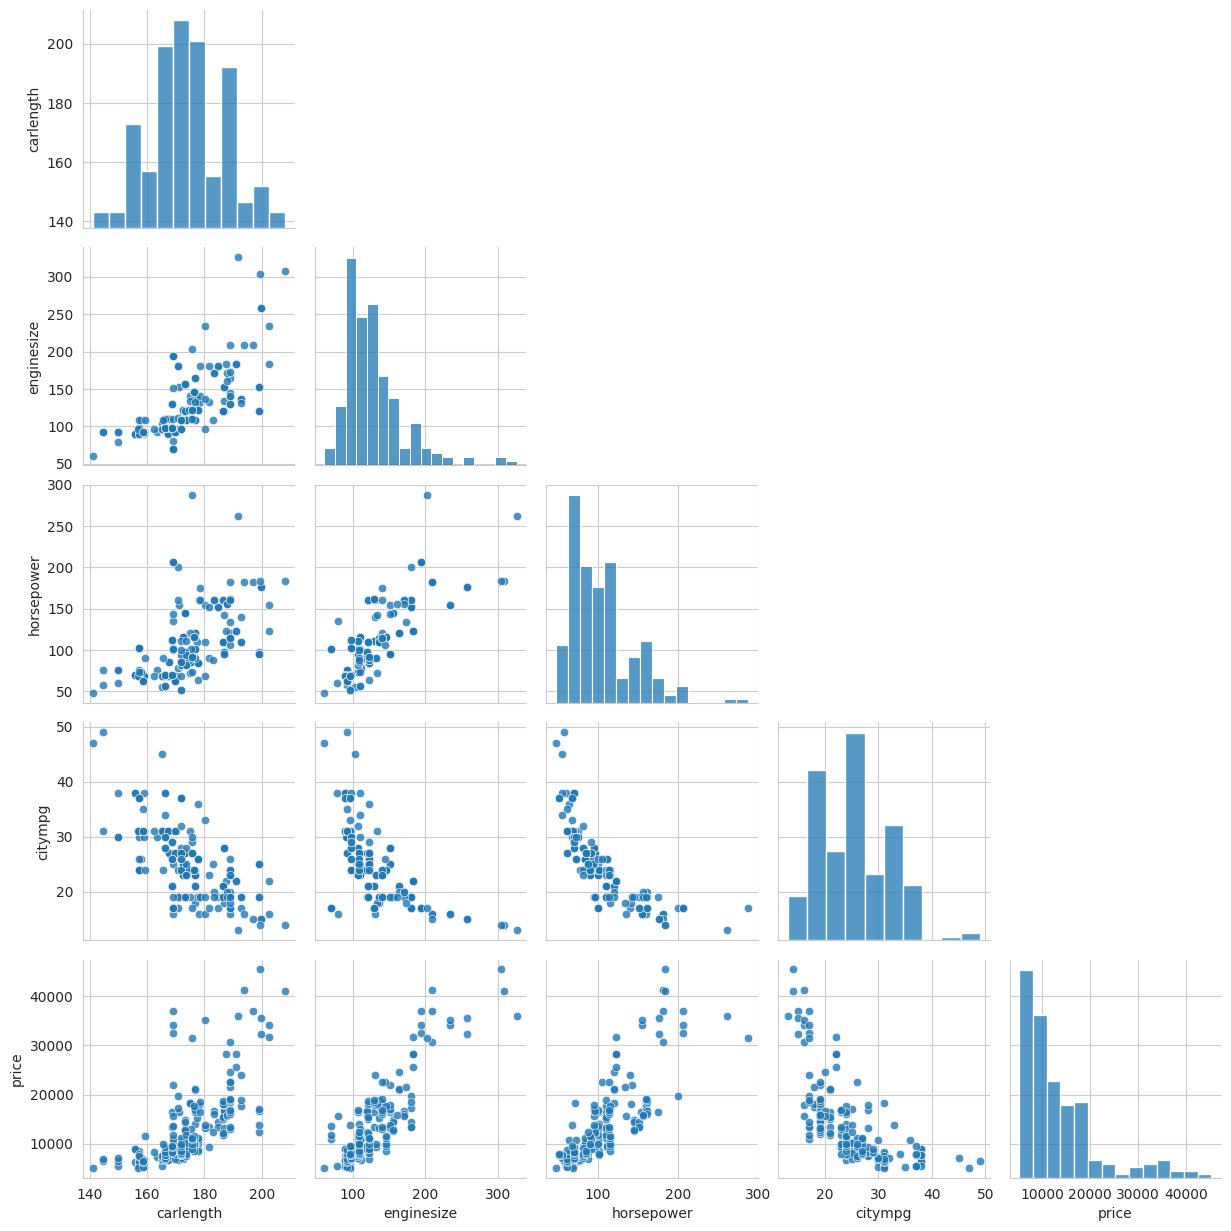

In [34]:
fig = sns.pairplot(data=df_pp_final, plot_kws={'alpha':0.8});
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
  fig.axes[i, j].set_visible(False)
plt.show()

We can see looking at the last row, the variables that are left have a strong correlation to price. We'll move forward to checking for outliers for price

I will make a histogram and boxplot to visually observe the distribution and check for outliers in Price and drop the data that falls outside 1.5xIQR range

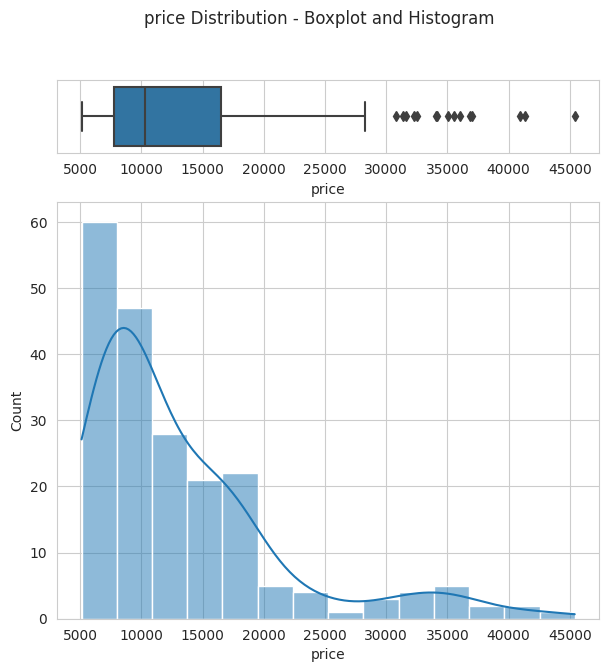

This is the range where a data point is not an outlier: from -5284.5 to 29575.5




In [18]:
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a data point is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

plot_histogram_and_boxplot(df[['price']])

In [ ]:
# Filter the DataFrame to keep only rows where the price is greater than 30000
filtered_df = df[df['price'] > 30000]

# Get the count of rows in the filtered DataFrame
count_over_30000 = len(filtered_df)

print(f"Number of rows with price over 30000: {count_over_30000}")

It seems the distribution is skewed heavily. There are 15 data points with a price higher than the upper bound. Lets see the effect of removing the outliers

---

# data cleaning from LMS

In [20]:
def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - used for quick feature engineering on numerical and categorical variables
  to decide which transformation can better transform the distribution shape 
  - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions

  """
  check_missing_values(df)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  # Loop over each variable and engineer the data according to the analysis type
  df_feat_eng = pd.DataFrame([])
  for column in df.columns:
    # create additional columns (column_method) to apply the methods
    df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = df[column]
      
    # Apply transformers in respectives column_transformers
    df_feat_eng, list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    # For each variable, assess how the transformations perform
    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  ### Check analyis type
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(df):
  if df.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing values in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  ### Set suffix colummns acording to analysis_type
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(20, 5))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show();
  print("\n")



def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(20, 6))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.show();


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  ### Winsorizer iqr
  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked




def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  ### LogTransformer base e
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

    ### LogTransformer base 10
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

In [ ]:
variables_engineering = ['price']
variables_engineering
df_engineering = df[variables_engineering].copy()
df_engineering.head(3)

In [ ]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering.dropna(),
                                            analysis_type='outlier_winsorizer')

---

# Data Cleaning

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
